In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
   # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения



# 1. Чтение и подготовка данных


In [2]:
url = "https://raw.githubusercontent.com/Sermjazhko/ML_SEA/master/netflix-rotten-tomatoes-metacritic-imdb.csv"
data = pd.read_csv(url)


Убираем ненужные символы в данных и ненужные столбцы. Добавляем столбец, который определяет кассовые сборы. 

In [3]:
data["Boxoffice"] = data["Boxoffice"].apply(lambda l: float(str(l).replace(",", "").replace("$", "")))
data.drop(['Netflix Link', 'IMDb Link', 'Summary', 'Image', 'Poster', 'TMDb Trailer', 'Trailer Site'], axis=1, inplace = True)
data["boolBoxoffice"] = np.where(data["Boxoffice"] >= 45000000, 1, 0) 

In [4]:
data.shape

(15480, 23)

Преобразуем к категориальным признакам

In [5]:
data['Runtime'] = data['Runtime'].astype('category')
data['Series or Movie'] = data['Series or Movie'].astype('category')

In [6]:
data.isna()
data.isna().sum()

Title                        0
Genre                     1710
Tags                        67
Languages                 1935
Series or Movie              0
Hidden Gem Score          2101
Country Availability        19
Runtime                      1
Director                  4708
Writer                    4330
Actors                    1925
View Rating               7024
IMDb Score                2099
Rotten Tomatoes Score     9098
Metacritic Score         11144
Awards Received           9405
Awards Nominated For      7819
Boxoffice                11473
Release Date              2107
Netflix Release Date         0
Production House         10331
IMDb Votes                2101
boolBoxoffice                0
dtype: int64

In [7]:
data['Genre'].fillna(data['Genre'].mode().iloc[0], inplace=True)
data['Tags'].fillna(data['Tags'].mode().iloc[0], inplace=True)
data['Languages'].fillna(data['Languages'].mode().iloc[0], inplace=True)
data['Country Availability'].fillna(data['Country Availability'].mode().iloc[0], inplace=True)
data['Runtime'].fillna(data['Runtime'].mode().iloc[0], inplace=True)
data['Director'].fillna(data['Director'].mode().iloc[0], inplace=True)
data['Writer'].fillna(data['Writer'].mode().iloc[0], inplace=True)
data['Actors'].fillna(data['Actors'].mode().iloc[0], inplace=True)
data['View Rating'].fillna(data['View Rating'].mode().iloc[0], inplace=True)
data['Release Date'].fillna(data['Release Date'].mode().iloc[0], inplace=True)
data['Production House'].fillna(data['Production House'].mode().iloc[0], inplace=True)


In [8]:
data.isna().sum()

Title                        0
Genre                        0
Tags                         0
Languages                    0
Series or Movie              0
Hidden Gem Score          2101
Country Availability         0
Runtime                      0
Director                     0
Writer                       0
Actors                       0
View Rating                  0
IMDb Score                2099
Rotten Tomatoes Score     9098
Metacritic Score         11144
Awards Received           9405
Awards Nominated For      7819
Boxoffice                11473
Release Date                 0
Netflix Release Date         0
Production House             0
IMDb Votes                2101
boolBoxoffice                0
dtype: int64

In [9]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)

In [10]:
data.isna().sum()

Title                    0
Genre                    0
Tags                     0
Languages                0
Series or Movie          0
Hidden Gem Score         0
Country Availability     0
Runtime                  0
Director                 0
Writer                   0
Actors                   0
View Rating              0
IMDb Score               0
Rotten Tomatoes Score    0
Metacritic Score         0
Awards Received          0
Awards Nominated For     0
Boxoffice                0
Release Date             0
Netflix Release Date     0
Production House         0
IMDb Votes               0
boolBoxoffice            0
dtype: int64

In [11]:
dataNew = data.loc[:, ['Series or Movie', 'Hidden Gem Score', 'Runtime', 'IMDb Score',
                            'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received', 'Awards Nominated For',
                           'Boxoffice',  'IMDb Votes', 'boolBoxoffice']].copy()

In [12]:
# заменяем на числовой
dataNew['Series or Movie'] = pd.factorize(dataNew['Series or Movie'])[0] 

In [13]:
# метод бинаризации 
runtime = pd.get_dummies(data['Runtime'])

In [14]:
dataNew = pd.concat((dataNew, runtime), axis=1)
dataNew = dataNew.drop(['Runtime'], axis=1)

In [15]:
dataNew.head()

,Series or Movie,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,IMDb Votes,boolBoxoffice,1-2 hour,30-60 mins,< 30 minutes,> 2 hrs
0,0,4.3,7.9,98.0,82.0,74.0,57.0,2122065.0,205926.0,0,0,0,1,0
1,1,7.0,5.8,79.0,69.0,1.0,5.0,70632.0,2838.0,0,1,0,0,0
2,1,6.4,4.3,64.0,46.0,3.0,5.0,16263.0,1720.0,0,1,0,0,0
3,0,7.7,6.5,64.0,57.0,1.0,5.0,19551067.0,1147.0,0,0,0,1,0
4,1,8.1,6.3,64.0,57.0,3.0,4.0,19551067.0,63.0,0,1,0,0,0


In [16]:
# нормализация

dataS = (dataNew - dataNew.mean(axis = 0))/dataNew.std(axis = 0)

# 2. Разбиваем данные на обучающую и тестовую выборки

In [17]:
dataS.columns

Index(['Series or Movie', 'Hidden Gem Score', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'IMDb Votes', 'boolBoxoffice',
       '1-2 hour', '30-60 mins', '< 30 minutes', '> 2 hrs'],
      dtype='object')

In [18]:
X = dataS.drop(['IMDb Score',  'Boxoffice', 'boolBoxoffice'], axis=1)
y = data['boolBoxoffice']

In [19]:
X.head()

,Series or Movie,Hidden Gem Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes,1-2 hour,30-60 mins,< 30 minutes,> 2 hrs
0,-1.758349,-0.830514,2.051316,2.692300,5.819900,2.216618,1.433442,-1.197763,-0.148494,1.695196,-0.388263
1,0.568679,0.447487,0.964018,1.295221,-0.360873,-0.207226,-0.292382,0.834836,-0.148494,-0.589864,-0.388263
2,0.568679,0.163487,0.105625,-1.176534,-0.191537,-0.207226,-0.301882,0.834836,-0.148494,-0.589864,-0.388263
3,-1.758349,0.778820,0.105625,0.005609,-0.360873,-0.207226,-0.306752,-1.197763,-0.148494,1.695196,-0.388263
4,0.568679,0.968153,0.105625,0.005609,-0.191537,-0.253839,-0.315963,0.834836,-0.148494,-0.589864,-0.388263


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape

N_train, N_test

(10371, 5109)

Подбор гиперпараметров

In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm

Подбор нейронов в однослойной сети. 

In [22]:
hidden_layer_size = np.linspace(1, 50, 50)
hidden_layer_size = hidden_layer_size.astype(int)
test_err, train_err = [], []
train_acc, test_acc = [], []

for size in tqdm(hidden_layer_size):
    model = MLPClassifier(hidden_layer_sizes=(size,), 
                          solver='adam', activation='relu', max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [02:51<00:00,  3.44s/it]


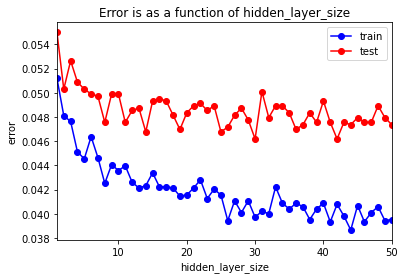

In [23]:
plt.plot(hidden_layer_size, train_err, 'b-o', label = 'train')
plt.plot(hidden_layer_size, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.title('Error is as a function of hidden_layer_size')
plt.xlabel('hidden_layer_size')
plt.ylabel('error')
plt.legend()

In [24]:

print("Train: Min error={0}, number of neurons={1}".format(np.min(train_err), hidden_layer_size[np.argmin(train_err)]))
print("Test: Min error={0}, number of neurons={1}".format(np.min(test_err), hidden_layer_size[np.argmin(test_err)]))

Train: Min error=0.038665509594060364, number of neurons=44
Test: Min error=0.046192992757878255, number of neurons=30


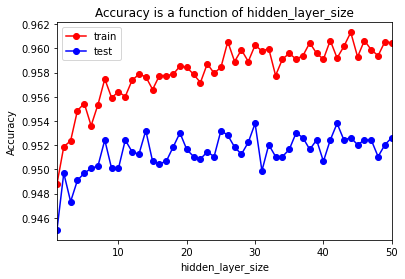

In [25]:
plt.plot(hidden_layer_size, train_acc, 'r-o', label = 'train')
plt.plot(hidden_layer_size, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.title('Accuracy is a function of hidden_layer_size')
plt.xlabel('hidden_layer_size')
plt.ylabel('Accuracy')
plt.legend()

In [26]:
print("Train: max accuracy={0}, number of neurons={1}".format(np.max(train_acc), hidden_layer_size[np.argmax(train_acc)]))
print("Test: max accuracy={0}, number of neurons={1}".format(np.max(test_acc), hidden_layer_size[np.argmax(test_acc)]))

Train: max accuracy=0.9613344904059397, number of neurons=44
Test: max accuracy=0.9538070072421218, number of neurons=30


Подборка количества нейронов для двуслойной сети

In [27]:
n = 10
sizes = np.linspace(1, 50, n).astype(int)
test_err = np.zeros((n, n))
train_err = np.zeros((n, n))
train_acc = np.zeros((n, n))
test_acc = np.zeros((n, n))

for i, size_1 in tqdm(enumerate(sizes)):
    for j, size_2 in enumerate(sizes):
        model = MLPClassifier(hidden_layer_sizes=(size_1, size_2, ), 
                              solver='adam', activation='relu', max_iter=1000, random_state=42)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_err[i][j] = np.mean(y_train != y_train_pred)
        test_err[i][j] = np.mean(y_test != y_test_pred)

        train_acc[i][j] = accuracy_score(y_train, y_train_pred)
        test_acc[i][j] = accuracy_score(y_test, y_test_pred)

10it [09:04, 54.49s/it]


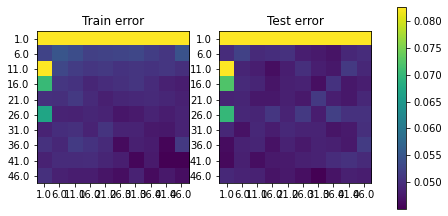

In [28]:
plt.subplot(121)
plt.title("Train error")
plt.imshow(train_err)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

plt.subplot(122)
plt.title("Test error")
plt.imshow(test_err)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

cax = plt.axes([0.96, 0.15, 0.02, 0.7])
plt.colorbar(cax=cax)

train_min_loss = np.where(train_err == np.min(train_err))
test_min_loss = np.where(test_err == np.min(test_err))

train_min_loss_sizes = [train_min_loss[0][0] * 5, train_min_loss[1][0] * 5]
test_min_loss_sizes = [test_min_loss[0][0] * 5, test_min_loss[1][0] * 5]

In [29]:
print("Train: Min error={0}, number of neurons={1},{2}".format(np.min(train_err), train_min_loss_sizes[0], train_min_loss_sizes[1]))
print("Test: error={0}, number of neurons={1},{2}\n".format(test_err[train_min_loss][0], train_min_loss_sizes[0], train_min_loss_sizes[1]))
print("Test: Min error={0}, number of neurons={1},{2}".format(np.min(test_err), test_min_loss_sizes[0], test_min_loss_sizes[1]))
print("Train: error={0}, number of neurons={1},{2}\n".format(train_err[test_min_loss][0], test_min_loss_sizes[0], test_min_loss_sizes[1]))

Train: Min error=0.03316941471410664, number of neurons=40,45
Test: error=0.04952045410060677, number of neurons=40,45

Test: Min error=0.045018594636915245, number of neurons=45,30
Train: error=0.037894127856523, number of neurons=45,30



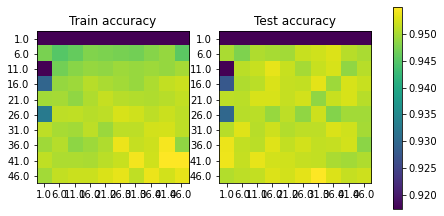

In [30]:
plt.subplot(121)
plt.title("Train accuracy")
plt.imshow(train_acc)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

plt.subplot(122)
plt.title("Test accuracy")
plt.imshow(test_acc)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

cax = plt.axes([0.95, 0.15, 0.02, 0.7])
plt.colorbar(cax=cax)

train_max_acc = np.where(train_acc == np.max(train_acc))
test_max_acc = np.where(test_acc == np.max(test_acc))

train_max_acc_sizes = [train_max_acc[0][0] * 5, train_max_acc[1][0] * 5]
test_max_acc_sizes = [test_max_acc[0][0] * 5, test_max_acc[1][0] * 5]

In [31]:
print("Train: Max accuracy={0}, number of neurons={1},{2}".format(np.max(train_acc), train_max_acc_sizes[0], train_max_acc_sizes[1]))
print("Test: accuracy={0}, number of neurons={1},{2}\n".format(test_acc[train_max_acc][0], train_max_acc_sizes[0], train_max_acc_sizes[1]))
print("Test: Max accuracy={0}, number of neurons={1},{2}".format(np.max(test_acc), test_max_acc_sizes[0], test_max_acc_sizes[1]))
print("Train: accuracy={0}, number of neurons={1},{2}\n".format(train_acc[test_max_acc][0], test_max_acc_sizes[0], test_max_acc_sizes[1]))

Train: Max accuracy=0.9668305852858934, number of neurons=40,45
Test: accuracy=0.9504795458993932, number of neurons=40,45

Test: Max accuracy=0.9549814053630847, number of neurons=45,30
Train: accuracy=0.962105872143477, number of neurons=45,30



Лучшие показатели подемонстрировала сеть из 2-ух слоев (точность на тестовой и обучающей выборке у неё выше). Самая оптимальная точность достигается при количесте нейронов (40,45). Будем подбирать параметры alpha для сети из 2-ух слоёв.

In [32]:
alpha_arr = np.logspace(-3, 2, 50)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in tqdm(alpha_arr):
    mlp_model = MLPClassifier(alpha=alpha, hidden_layer_sizes=(30,40),
                              solver='adam', activation='relu', max_iter=1000, random_state=42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [04:15<00:00,  5.12s/it]


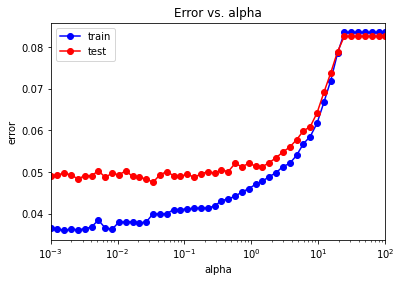

In [33]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

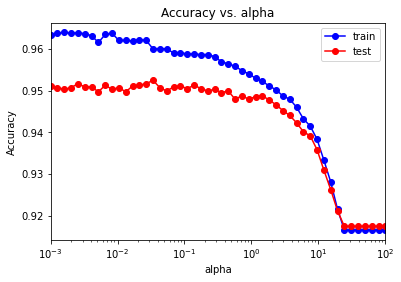

In [34]:
plt.semilogx(alpha_arr, train_acc, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [35]:
alpha_arr2 = np.logspace(-3, 2, 50)
test_err2 = []
train_err2 = []
train_acc2 = []
test_acc2 = []

for alpha in tqdm(alpha_arr2):
    mlp_model = MLPClassifier(alpha=alpha, hidden_layer_sizes=(10,),
                              solver='adam', activation='relu', max_iter=1000, random_state=42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    train_err2.append(np.mean(y_train != y_train_pred))
    test_err2.append(np.mean(y_test != y_test_pred))
    train_acc2.append(accuracy_score(y_train, y_train_pred))
    test_acc2.append(accuracy_score(y_test, y_test_pred))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [01:32<00:00,  1.84s/it]


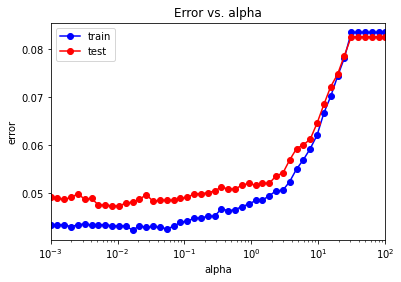

In [36]:
plt.semilogx(alpha_arr2, train_err2, 'b-o', label = 'train')
plt.semilogx(alpha_arr2, test_err2, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr2), np.max(alpha_arr2)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

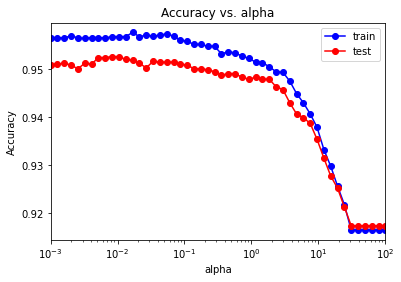

In [37]:
plt.semilogx(alpha_arr2, train_acc2, 'b-o', label = 'train')
plt.semilogx(alpha_arr2, test_acc2, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr2), np.max(alpha_arr2)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [41]:
alpha_opt = 4
print("Alpha o:", alpha_opt)

Alpha o: 4


Классификатор при найденном alpha.

In [42]:
mlp_model = MLPClassifier(alpha=alpha_opt, hidden_layer_sizes=(20,),
                          solver='adam', activation='relu', random_state=42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

Матрица рассогласования.

In [45]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[4626  234]
 [  61  188]]


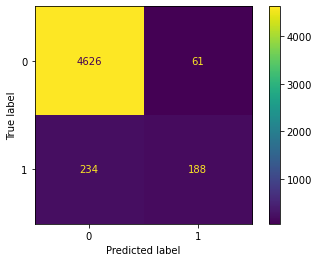

In [48]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp_model, X_test, y_test) 
plt.show()

# Выводы

1. Подбор числа нейронов в однослойной моделе
1) Почти одинаковое распределение тренировочных и тестовых данных.
2) Наблюдается переобучение. 
3) При количестве нейровнов в слое больше 2 уже достигается точность выше 93%. Это говорит о том, что все входные объекты могут быть спроецированы в двумерное пространство и разделены на классы с высокой точностью 93%.

2. Подбор числа нейронов в двуслойной моделе
1) Наблюдается недообучение тренировочной выборки на 1%.\

3. Подбор параметра регуляризации
С ростом коэффициента регуляризации растёт ошибка и снижается точность. Это говорит о том, что после обучения у модели не возникает больших значений весовых коэффициентов, а значит нет переобучения. При alpha > 10e-1 начинается рост ошибки и снижение точности, то есть с ростом alpha веса модели уменьшаются и стремятся к нулю. 